# Milestone 5 - Modeling

In [2]:
#import libraries
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#load the dataset
#reddit dataset
reddit = pd.read_csv('reddit_sentiments.csv', encoding='utf-8-sig')
reddit.head()

,SCORE,ID,SUBREDDIT,NUM_COMMENTS,TIMESTAMP,TIME_OF_DAY,TEXT,NEG,NEU,POS,COMPOUND,SENTIMENTS
0,45,g94qma,SuggestALaptop,0,2020/04/28 09:06:12,Morning,Ignore Private Messages Suggesting Laptops The...,0.079,0.812,0.108,0.7184,1
1,42,ekkvox,SuggestALaptop,2,2020/01/06 15:23:07,Afternoon,SuggestALaptop Stress Test Project! Submit Vie...,0.030,0.833,0.137,0.9408,1
2,16,gqt1pd,SuggestALaptop,15,2020/05/27 00:20:20,Night,I need a laptop for gaming coding video editin...,0.015,0.818,0.166,0.9883,1
3,5,gqv6vt,SuggestALaptop,1,2020/05/27 03:22:56,Night,So I can't buy this yet? If I can buy it where...,0.051,0.785,0.164,0.9577,1
4,16,gqp7ra,SuggestALaptop,30,2020/05/26 19:15:01,Evening,Alienware M15 vs Lenovo Y740? Any thoughts on ...,0.000,0.905,0.095,0.8753,1


In [4]:
#comments under reddit post dataset
comments = pd.read_csv('comments_sentiments.csv', encoding='utf-8-sig')
comments.head()

,ID,SUBREDDIT,NEW_COMMENTS,NEG,NEU,POS,COMPOUND,SENTIMENTS
0,ekkvox,SuggestALaptop,have questions our Discord Server is best way ...,0.124,0.598,0.278,0.8257,1
1,ekkvox,SuggestALaptop,Can anyone help me out purchasing a laptop for...,0.000,0.857,0.143,0.7059,1
2,gqt1pd,SuggestALaptop,Ask chewy,0.000,1.000,0.000,0.0000,0
3,gqt1pd,SuggestALaptop,Looks like a great deal at that price!,0.000,0.420,0.580,0.7840,1
4,gqt1pd,SuggestALaptop,Ideapad or yoga whatever they are called where...,0.000,1.000,0.000,0.0000,0


In [5]:
#twitter dataset
twitter = pd.read_csv('twitter_sentiments.csv', encoding='utf-8-sig')
twitter.head()

,TIMESTAMP,MODEL,NEW_TEXT,TIME_OF_DAY,NEG,NEU,POS,COMPOUND,SENTIMENTS
0,2020/05/28 19:30:02,HP Spectre,90s fun for the kids HP HPSpectre laptops comp...,Evening,0.000,0.784,0.216,0.7650,1
1,2020/05/28 04:38:28,HP Spectre,Save 200 on the HP Spectre x360 Now 1349.99! O...,Night,0.000,0.841,0.159,0.6467,1
2,2020/05/24 01:58:02,HP Spectre,Are you ready for a Change? Why not try an alt...,Night,0.000,0.882,0.118,0.5514,1
3,2020/05/22 22:38:01,HP Spectre,Amazon is under investigation in France declar...,Evening,0.117,0.843,0.040,-0.6476,-1
4,2020/05/20 11:40:37,HP Spectre,Brand new sealed HP SPECTRE X360 i7 512gb 8gb ...,Morning,0.000,1.000,0.000,0.0000,0


In [6]:
#merge all the text and sentiments columns
df1 = reddit[['SUBREDDIT', 'TEXT', 'SENTIMENTS']]
df1.columns = ['MODEL', 'TEXT', 'SENTIMENTS']
df2 = comments[['SUBREDDIT', 'NEW_COMMENTS', 'SENTIMENTS']]
df2.columns = ['MODEL', 'TEXT', 'SENTIMENTS']
df3 = twitter[['MODEL', 'NEW_TEXT', 'SENTIMENTS']]
df3.columns = ['MODEL', 'TEXT', 'SENTIMENTS']
print(df1.shape)
print(df2.shape)
print(df3.shape)
print('\n')

text_df = pd.concat([df1,df2,df3])
print(text_df.shape)
text_df.head()

(5979, 3)
(14465, 3)
(24102, 3)


(44546, 3)


,MODEL,TEXT,SENTIMENTS
0,SuggestALaptop,Ignore Private Messages Suggesting Laptops The...,1
1,SuggestALaptop,SuggestALaptop Stress Test Project! Submit Vie...,1
2,SuggestALaptop,I need a laptop for gaming coding video editin...,1
3,SuggestALaptop,So I can't buy this yet? If I can buy it where...,1
4,SuggestALaptop,Alienware M15 vs Lenovo Y740? Any thoughts on ...,1


## Data exploration

In [7]:
#settings for plot
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


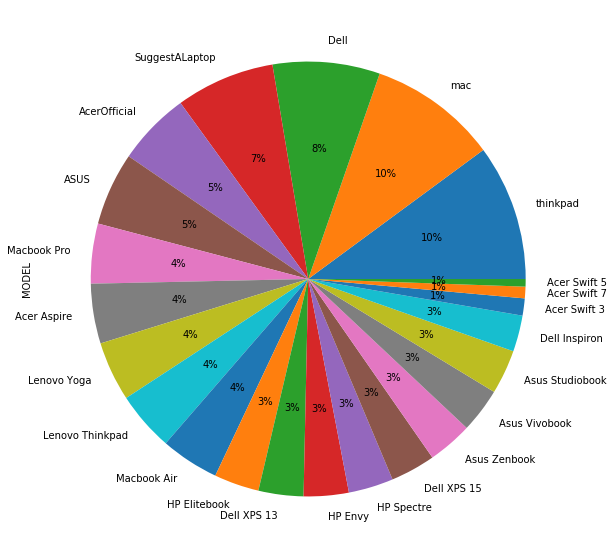

In [8]:
text_df.MODEL.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

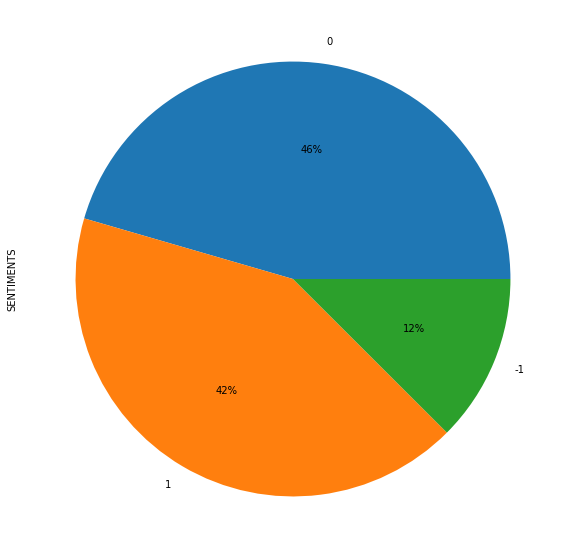

In [9]:
text_df.SENTIMENTS.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

Sentiments column description:
* 1 - Positive sentiments
* 0 - Neutral sentiments
* -1 - Negative sentiments

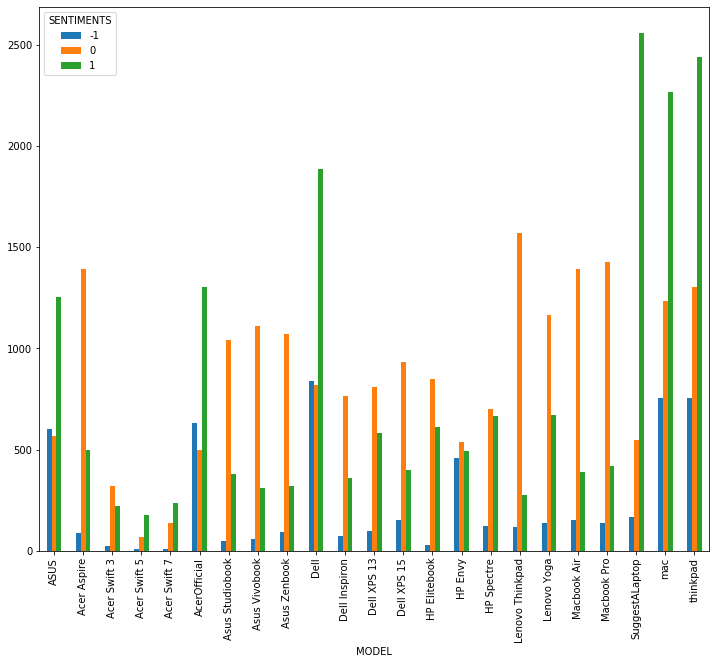

In [10]:
laptop_sentiment = text_df.groupby(['MODEL', 'SENTIMENTS']).SENTIMENTS.count().unstack()
laptop_sentiment.plot(kind='bar')
plt.show()

In [11]:
#feature selection
features = text_df.iloc[:, 1].values
labels = text_df.iloc[:, 2].values

In [12]:
#simple data cleaning
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_noise(features, stop_words):
    processed_features = []

    for sentence in range(0, len(features)):
        # Remove all the special characters
        processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    
        # Remove numbers
        processed_feature = re.sub(r'[0-9]+', ' ', processed_feature)

        # Remove all single characters
        processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

        # Remove single characters from the start
        processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

        # Substituting multiple spaces with single space
        processed_feature = re.sub(r'\s+', ' ', processed_feature)

        # Removing prefixed 'b'
        processed_feature = re.sub(r'^b\s+', '', processed_feature)

        # Converting to Lowercase
        processed_feature = processed_feature.lower()
        
        # Removing stopwords
        processed_feature = ' '.join([word for word in processed_feature.split() if word not in stop_words])

        processed_features.append(processed_feature)
    
    return processed_features

processed_features = remove_noise(features, stop_words)
processed_features = pd.DataFrame(processed_features)
processed_features.columns = ['TEXT']

In [13]:
print(processed_features.shape)
processed_features.head()

(44546, 1)


,TEXT
0,ignore private messages suggesting laptops pri...
1,suggestalaptop stress test project submit view...
2,need laptop gaming coding video editing etc la...
3,buy yet buy find total budget local currency c...
4,alienware vs lenovo thoughts potentially bette...


## Text normalization

In [14]:
#tokenizing
tokenized_features = processed_features['TEXT'].apply(lambda x: x.split())
print(tokenized_features.head())

0    [ignore, private, messages, suggesting, laptop...
1    [suggestalaptop, stress, test, project, submit...
2    [need, laptop, gaming, coding, video, editing,...
3    [buy, yet, buy, find, total, budget, local, cu...
4    [alienware, vs, lenovo, thoughts, potentially,...
Name: TEXT, dtype: object


In [15]:
#stemming
from nltk.stem.porter import *

stemmer = PorterStemmer()
tokenized_features = tokenized_features.apply(lambda x: [stemmer.stem(i) for i in x])

In [16]:
#stitch the tokens back together
for i in range(len(tokenized_features)):
    tokenized_features[i] = ' '.join(tokenized_features[i])
    
processed_features['TEXT'] = tokenized_features

In [17]:
#Term Frequency and Inverse Document Frequency(TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=2, max_df=0.9, stop_words='english')
processed_features = tfidf_vectorizer.fit_transform(processed_features['TEXT'])
print(processed_features.shape)

(44546, 1000)


In [18]:
#splitting training and testing set
#import library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features[:44546,:], labels, test_size=0.3, random_state=42)

In [ ]:
#save the training and testing data
scipy.sparse.save_npz('xtrain.npz', X_train)
scipy.sparse.save_npz('xtest.npz', X_test)
np.savetxt('ytrain.txt', y_train)
np.savetxt('ytest.txt', y_test)

## Building the model
These are the list of algorithms used for modeling text classifier:
1. Logistic Regression
2. Random Forest
3. Gaussian Naive Bayes
4. Support Vector Machine
5. XGBoost

### 1. Logistic Regression

In [19]:
#training the model
#import library
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#making predictions
predictions_lr = log_reg.predict(X_test)

In [21]:
#calculating the accuracy
#import libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

acc_lr = round(accuracy_score(y_test, predictions_lr) * 100, 2)
fsc_lr = round(f1_score(y_test, predictions_lr, average='macro') * 100, 2)
print('Accuracy of Logistic Regression model : ', acc_lr)
print('F1-score of Logistic Regression model : ', fsc_lr)

Accuracy of Logistic Regression model :  82.72
F1-score of Logistic Regression model :  74.0


### 2. Random Forest

In [22]:
#training the model
#import library
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=400, random_state=11)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [23]:
#making predictions
predictions_rf = text_classifier.predict(X_test)

In [24]:
#calculating the accuracy
acc_rf = round(accuracy_score(y_test, predictions_rf) * 100, 2)
fsc_rf = round(f1_score(y_test, predictions_rf, average='macro') * 100, 2)
print('Accuracy of Random Forest model : ', acc_rf)
print('F1-score of Random Forest model : ', fsc_rf)

Accuracy of Random Forest model :  83.62
F1-score of Random Forest model :  71.77


### 3. Gaussian Naive Bayes

In [25]:
#import library
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()                       
model.fit(X_train.toarray(), y_train)             

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
#making predictions
predictions_nb = model.predict(X_test.toarray())

In [27]:
#calculating the accuracy
acc_nb = round(accuracy_score(y_test, predictions_nb) * 100, 2)
fsc_nb = round(f1_score(y_test, predictions_nb, average='macro') * 100, 2)
print('Accuracy of Gaussian Naive Bayes model : ', acc_nb)
print('F1-score of Gaussian Naive Bayes model : ', fsc_nb)

Accuracy of Gaussian Naive Bayes model :  68.77
F1-score of Gaussian Naive Bayes model :  63.38


### 4. Support Vector Machine

In [28]:
#import library
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
#making predictions
predictions_svm = svc.predict(X_test)

In [30]:
#calculating the accuracy
acc_svm = round(accuracy_score(y_test, predictions_svm) * 100, 2)
fsc_svm = round(f1_score(y_test, predictions_svm, average='macro') * 100, 2)
print('Accuracy of Support Vector Machine model : ', acc_svm)
print('F1-score of Support Vector Machine model : ', fsc_svm)

Accuracy of Support Vector Machine model :  84.06
F1-score of Support Vector Machine model :  76.1


### 5. XGBoost

In [31]:
#import library
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=6, n_estimators=1000)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
# Prediction on test data
predictions_xgb = xgb.predict(X_test)

In [33]:
#calculating the accuracy
acc_xgb = round(accuracy_score(y_test, predictions_xgb) * 100, 2)
fsc_xgb = round(f1_score(y_test, predictions_xgb, average='macro') * 100, 2)
print('Accuracy of XGBoost model : ', acc_xgb)
print('F1-score of XGBoost model : ', fsc_xgb)

Accuracy of XGBoost model :  84.88
F1-score of XGBoost model :  76.81


## Model Comparison

In [34]:
#comparison of the models
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gaussian Naive Bayes', 'Support Vector Machine', 'XGBoost'],
    'Accuracy Score': [acc_lr, acc_rf, acc_nb, acc_svm, acc_xgb], 
    'F1-Score': [fsc_lr, fsc_rf, fsc_nb, fsc_svm, fsc_xgb]})
models

,Model,Accuracy Score,F1-Score
0,Logistic Regression,82.72,74.00
1,Random Forest,83.62,71.77
2,Gaussian Naive Bayes,68.77,63.38
3,Support Vector Machine,84.06,76.10
4,XGBoost,84.88,76.81


## Model evaluation

In [37]:
#save the accuracy table
#import library
from sklearn.metrics import confusion_matrix

matrix_lr = confusion_matrix(y_test, predictions_lr)
matrix_rf = confusion_matrix(y_test, predictions_rf)
matrix_nb = confusion_matrix(y_test, predictions_nb)
matrix_svm = confusion_matrix(y_test, predictions_svm)
matrix_xgb = confusion_matrix(y_test, predictions_xgb)

dfm1 = pd.DataFrame(matrix_lr, columns=["Negatives", "Neutrals", "Positives"], index=["Negatives", "Neutrals", "Positives"])
dfm2 = pd.DataFrame(matrix_rf, columns=["Negatives", "Neutrals", "Positives"], index=["Negatives", "Neutrals", "Positives"])
dfm3 = pd.DataFrame(matrix_nb, columns=["Negatives", "Neutrals", "Positives"], index=["Negatives", "Neutrals", "Positives"])
dfm4 = pd.DataFrame(matrix_svm, columns=["Negatives", "Neutrals", "Positives"], index=["Negatives", "Neutrals", "Positives"])
dfm5 = pd.DataFrame(matrix_xgb, columns=["Negatives", "Neutrals", "Positives"], index=["Negatives", "Neutrals", "Positives"])

print('Confusion matrix of Logistic Regression model:')
dfm1

Confusion matrix of Logistic Regression model:


,Negatives,Neutrals,Positives
Negatives,617,486,549
Neutrals,55,5646,319
Positives,137,763,4792


In [38]:
print('Confusion matrix of Random Forest model:')
dfm2

Confusion matrix of Random Forest model:


,Negatives,Neutrals,Positives
Negatives,449,365,838
Neutrals,46,5584,390
Positives,86,464,5142


In [39]:
print('Confusion matrix of Gaussian Naive Bayes model:')
dfm3

Confusion matrix of Gaussian Naive Bayes model:


,Negatives,Neutrals,Positives
Negatives,1083,328,241
Neutrals,672,5037,311
Positives,1724,898,3070


In [40]:
print('Confusion matrix of Support Vector Machine model:')
dfm4

Confusion matrix of Support Vector Machine model:


,Negatives,Neutrals,Positives
Negatives,695,440,517
Neutrals,47,5672,301
Positives,183,642,4867


In [41]:
print('Confusion matrix of XGBoost model:')
dfm5

Confusion matrix of XGBoost model:


,Negatives,Neutrals,Positives
Negatives,733,377,542
Neutrals,112,5620,288
Positives,233,468,4991


In [50]:
#save the classification report table
#import library
from sklearn.metrics import classification_report

report_lr = classification_report(y_test, predictions_lr, output_dict=True)
report_rf = classification_report(y_test, predictions_rf, output_dict=True)
report_nb = classification_report(y_test, predictions_nb, output_dict=True)
report_svm = classification_report(y_test, predictions_svm, output_dict=True)
report_xgb = classification_report(y_test, predictions_xgb, output_dict=True)

dfc1 = pd.DataFrame(report_lr).transpose()
dfc2 = pd.DataFrame(report_rf).transpose()
dfc3 = pd.DataFrame(report_nb).transpose()
dfc4 = pd.DataFrame(report_svm).transpose()
dfc5 = pd.DataFrame(report_xgb).transpose()

print('Classification report of Logistic Regression model:')
dfc1

Classification report of Logistic Regression model:


,precision,recall,f1-score,support
-1,0.762670,0.373487,0.501422,1652.000000
0,0.818854,0.937874,0.874332,6020.000000
1,0.846643,0.841883,0.844257,5692.000000
accuracy,0.827222,0.827222,0.827222,0.827222
macro avg,0.809389,0.717748,0.740004,13364.000000
weighted avg,0.823745,0.827222,0.815425,13364.000000


In [51]:
print('Classification report of Random Forest model:')
dfc2

Classification report of Random Forest model:


,precision,recall,f1-score,support
-1,0.772806,0.271792,0.402150,1652.000000
0,0.870731,0.927575,0.898255,6020.000000
1,0.807221,0.903373,0.852595,5692.000000
accuracy,0.836202,0.836202,0.836202,0.836202
macro avg,0.816919,0.700913,0.717666,13364.000000
weighted avg,0.831576,0.836202,0.817481,13364.000000


In [52]:
print('Classification report of Gaussian Naive Bayes model:')
dfc3

Classification report of Gaussian Naive Bayes model:


,precision,recall,f1-score,support
-1,0.311296,0.655569,0.422140,1652.000000
0,0.804247,0.836711,0.820158,6020.000000
1,0.847598,0.539353,0.659223,5692.000000
accuracy,0.687668,0.687668,0.687668,0.687668
macro avg,0.654381,0.677211,0.633840,13364.000000
weighted avg,0.761775,0.687668,0.702411,13364.000000


In [53]:
print('Classification report of Support Vector Machine model:')
dfc4

Classification report of Support Vector Machine model:


,precision,recall,f1-score,support
-1,0.751351,0.420702,0.539387,1652.000000
0,0.839799,0.942193,0.888054,6020.000000
1,0.856113,0.855060,0.855586,5692.000000
accuracy,0.840617,0.840617,0.840617,0.840617
macro avg,0.815754,0.739318,0.761009,13364.000000
weighted avg,0.835814,0.840617,0.831124,13364.000000


In [54]:
print('Classification report of XGBoost model:')
dfc5

Classification report of XGBoost model:


,precision,recall,f1-score,support
-1,0.679963,0.443705,0.536996,1652.000000
0,0.869296,0.933555,0.900280,6020.000000
1,0.857413,0.876845,0.867020,5692.000000
accuracy,0.848848,0.848848,0.848848,0.848848
macro avg,0.802224,0.751368,0.768099,13364.000000
weighted avg,0.840830,0.848848,0.841206,13364.000000
